In [7]:
import sys
configDir =  '/home/thibaud/repos/anaconda/rakuten/notebook'
if configDir not in sys.path:
    sys.path.append(configDir)

import config


import warnings
warnings.filterwarnings('ignore')
from importlib import reload
import src.utils.results as results
from sklearn.metrics import f1_score

# print(config.path_to_data)
reload(results)

from src.utils.results import ResultsManager
res = ResultsManager(config)
# res.add_result_file('../results/results_benchmark_text_90.csv', 'text')
# res.add_result_file('../results/results_benchmark_bert_90.csv', 'text')
# res.add_result_file('../results/results_benchmark_img_90.csv', 'img')
# res.add_result_file('../results/results_benchmark_fusion_TF_90.csv', 'fusion')
res.add_result_file('../results/results_benchmark_sklearn.csv', 'text')
# res.add_result_file('../results/results_benchmark_sklearn_tfidf.csv', 'text')
res.add_result_file('../results/results_benchmark_tfidf.csv', 'text')
# res.add_result_file('../results/results_benchmark_skipgram.csv', 'text')
# res.add_result_file('../results/results_benchmark_cbow.csv', 'text')
res.add_result_file('../results/results_benchmark_bert.csv', 'bert')
res.add_result_file('../results/results_benchmark_img.csv', 'img')
res.add_result_file('../results/results_benchmark_fusion_TF.csv', 'fusion')

In [23]:
res.voting_pred_cross_validate([
        'fusion/camembert-base-vit_b16_TF6_att12',
        'text/xgboost_tfidf',
        'text/camembert-base-ccnet',
        'image/vit_b16',
        'text/flaubert_base_uncased',
        'image/ResNet152' 
        ], dataset_size=1)

model / fold                               f1 score
---------------------------------------  ----------
fusion/camembert-base-vit_b16_TF6_att12    0.89876
text/xgboost_tfidf                         0.819312
text/camembert-base-ccnet                  0.885786
image/vit_b16                              0.674881
text/flaubert_base_uncased                 0.877612
image/ResNet152                            0.657804
voting fold 0                              0.908802
voting fold 1                              0.911466
voting fold 2                              0.912814
voting fold 3                              0.917343
voting fold 4                              0.917856
voting mean weighted                       0.913656
voting mean macro                          0.905693


0.9136560095714408

In [11]:
res.get_model_paths()

array(['text/xgboost_tfidf__90', 'text/camembert-base-ccnet__90',
       'text/flaubert_base_uncased__90', 'image/vit_b16__90',
       'image/ResNet152__90',
       'fusion/camembert-base-vit_b16_TF6_att12_90',
       'text/LogisticRegression_cbow', 'text/RandomForestClassifier_cbow',
       'text/SVC_cbow', 'text/xgboost_cbow', 'text/SVC_skipgram',
       'text/LogisticRegression_skipgram',
       'text/RandomForestClassifier_skipgram', 'text/xgboost_skipgram',
       'text/LinearSVC_tfidf', 'text/LogisticRegression_tfidf',
       'text/MultinomialNB_tfidf', 'text/RandomForestClassifier_tfidf',
       'text/xgboost_tfidf', 'text/SVC_tfidf',
       'text/camembert-base-ccnet', 'text/camembert-base',
       'text/flaubert_base_uncased', 'image/vit_b16', 'image/ResNet152',
       'image/ResNet101', 'image/EfficientNetB1', 'image/ResNet50',
       'fusion/camembert-base-vit_b16_TF6',
       'fusion/camembert-base-vit_b16_TF3_att12',
       'fusion/camembert-base-vit_b16_TF6_att12',
      

In [19]:
print (res.voting_pred_cross_validate(
    [
        'fusion/camembert-base-vit_b16_TF6_att12',
        'text/xgboost_tfidf',
        'text/camembert-base-ccnet',
        'image/vit_b16',
        'text/flaubert_base_uncased',
        'image/ResNet152' 
        ],
    n_folds=10,
    dataset_size=0.5))



Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7e5aced19b50>>
Traceback (most recent call last):
  File "/home/thibaud/intel/oneapi/intelpython/envs/tensorflow/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [3]:
print (res.voting_pred_cross_validate(
    [
        'fusion/camembert-base-vit_b16_TF6_att12_90',
        'text/xgboost_tfidf__90',
        'text/camembert-base-ccnet__90',
        'image/vit_b16__90',
        'text/flaubert_base_uncased__90',
        'image/ResNet152__90' 
        ],
        n_folds=5,
    dataset_size=1))

model / fold                                  f1 score
------------------------------------------  ----------
fusion/camembert-base-vit_b16_TF6_att12_90    0.901472
text/xgboost_tfidf__90                        0.823756
text/camembert-base-ccnet__90                 0.889624
image/vit_b16__90                             0.683567
text/flaubert_base_uncased__90                0.892962
image/ResNet152__90                           0.659622
voting fold 0                                 0.91572
voting fold 1                                 0.920977
voting fold 2                                 0.922666
voting fold 3                                 0.918433
voting fold 4                                 0.907218
voting mean weighted                          0.917003
voting mean macro                             0.905378
0.9170028211924235


# Plot des performances texte générales


In [2]:
import src.utils.plot as uplot

reload(uplot)
res.plot_f1_scores(['text'], figsize=(800,400), title="f1_score des modèles ML sur le texte")

In [4]:
reload(uplot)
reload(results)
res.plot_f1_scores(filter_model=['text/LinearSVC_tfidf', 'text/camembert-base', 'text/camembert-base-ccnet', 'text/flaubert_base_uncased'], figsize=(800,300), title="f1 scores des modèles BERT par rapport au meilleur modèle ML")

In [7]:
res.plot_f1_scores_by_prdtype(
    filter_model=['text/LinearSVC_tfidf', 'text/camembert-base', 'text/camembert-base-ccnet', 'text/flaubert_base_uncased'],
    title="f1 scores par classedes modèles BERT par rapport au meilleur modèle ML")

# Matrice de confusion LinearSVC-tfidf

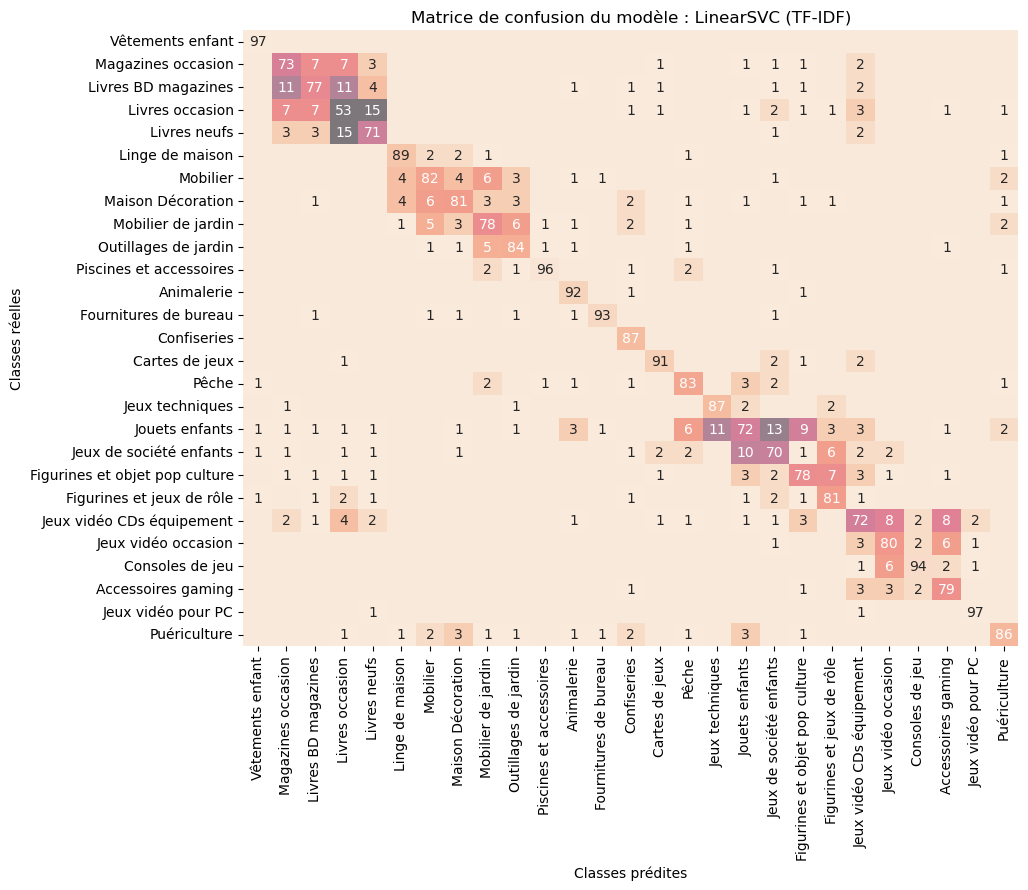

In [2]:
import src.utils.plot as uplot
import src.utils.results as results
reload(uplot)
reload(results)
res.plot_confusion_matrix('text/LinearSVC_tfidf', model_label='LinearSVC (TF-IDF)')

In [2]:
import src.utils.plot as uplot
import src.utils.results as results
reload(uplot)
reload(results)
res.plot_f1_scores_report('text/LinearSVC_tfidf', model_label='LinearSVC (TF-IDF)')

                                precision    recall  f1-score   support

               Livres occasion       0.53      0.52      0.52       623
Figurines et objet pop culture       0.78      0.79      0.79       534
                Cartes de jeux       0.91      0.96      0.93       791
     Figurines et jeux de rôle       0.81      0.56      0.66       153
                Jouets enfants       0.72      0.66      0.69       974
       Jeux de société enfants       0.70      0.55      0.62       414
               Jeux techniques       0.87      0.96      0.91      1009
              Vêtements enfant       0.97      0.96      0.97       161
                         Pêche       0.83      0.81      0.82       498
                  Puériculture       0.86      0.81      0.83       648
                      Mobilier       0.82      0.84      0.83      1015
               Linge de maison       0.89      0.92      0.91       861
                   Confiseries       0.87      0.95      0.91  

In [5]:
bimport src.utils.plot as uplot
import src.utils.results as results
reload(uplot)
reload(results)
res.plot_f1_scores_report('text/camembert-base-ccnet', model_label='CamemBERT (CCNet)')

                                precision    recall  f1-score   support

               Livres occasion       0.70      0.67      0.69       623
Figurines et objet pop culture       0.83      0.86      0.84       534
                Cartes de jeux       0.93      0.97      0.95       791
     Figurines et jeux de rôle       0.70      0.65      0.67       153
                Jouets enfants       0.83      0.80      0.82       974
       Jeux de société enfants       0.75      0.71      0.73       414
               Jeux techniques       0.98      0.99      0.98      1009
              Vêtements enfant       0.98      0.96      0.97       161
                         Pêche       0.85      0.83      0.84       498
                  Puériculture       0.91      0.87      0.89       648
                      Mobilier       0.89      0.90      0.89      1015
               Linge de maison       0.95      0.91      0.93       861
                   Confiseries       0.93      0.94      0.94  

In [6]:
import src.utils.plot as uplot
import src.utils.results as results
reload(uplot)
reload(results)
res.plot_f1_scores_report('image/vit_b16', model_label='CamemBERT (CCNet)')

                                precision    recall  f1-score   support

               Livres occasion       0.49      0.67      0.57       623
Figurines et objet pop culture       0.71      0.66      0.69       534
                Cartes de jeux       0.96      0.94      0.95       791
     Figurines et jeux de rôle       0.60      0.35      0.44       153
                Jouets enfants       0.48      0.41      0.45       974
       Jeux de société enfants       0.41      0.34      0.37       414
               Jeux techniques       0.69      0.78      0.73      1009
              Vêtements enfant       0.81      0.72      0.76       161
                         Pêche       0.55      0.50      0.52       498
                  Puériculture       0.56      0.53      0.55       648
                      Mobilier       0.63      0.60      0.62      1015
               Linge de maison       0.83      0.82      0.83       861
                   Confiseries       0.84      0.76      0.79  

In [13]:
# models = res.get_model_paths()

# for model in models:
#     print(res.get_model_label(model))
#     try:
#         res.plot_confusion_matrix(model, model_label=res.get_model_label(model))
#     except:
#         print('error')
    

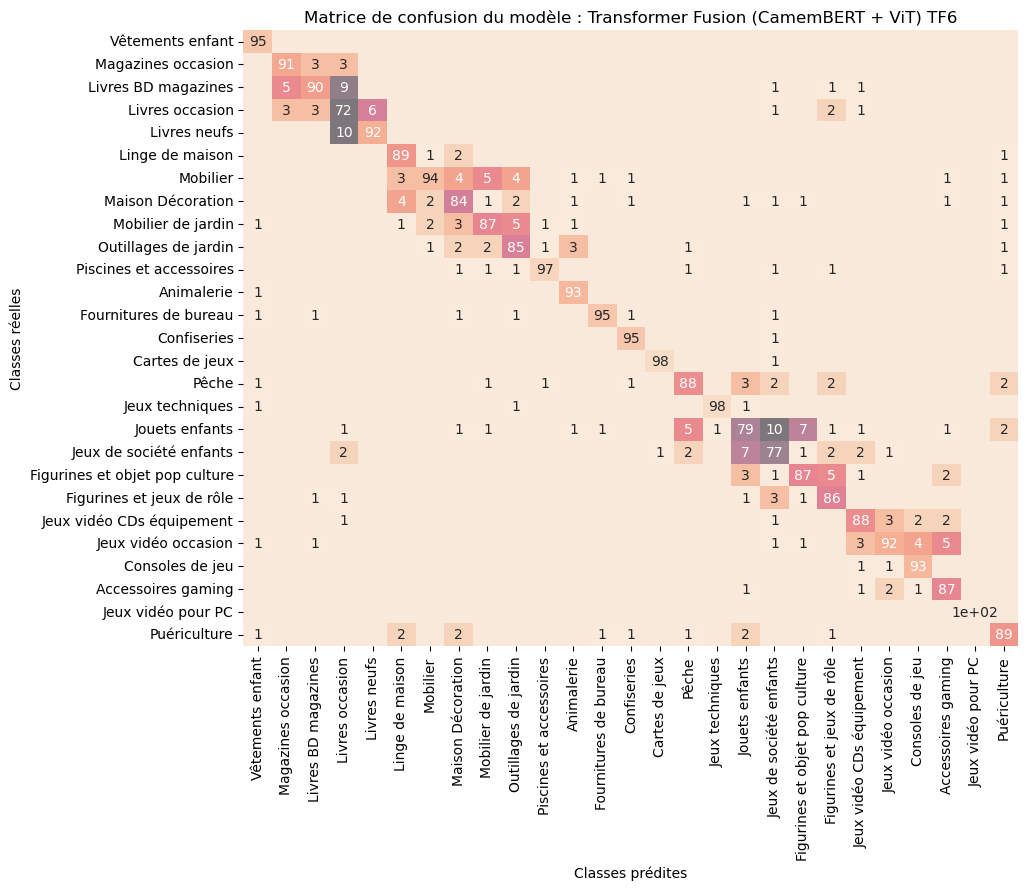

In [16]:
res.plot_confusion_matrix('fusion/camembert-base-vit_b16_TF6', model_label='Transformer Fusion (CamemBERT + ViT) TF6')

# Anomalies de classification résultantes

In [4]:
import pandas as pd
import src.utils.results as results

from importlib import reload
reload(results)

y_pred = res.voting_pred(
    [
        'fusion/camembert-base-vit_b16_TF6',
        'text/xgboost_tfidf',
        'text/camembert-base-ccnet',
        'image/vit_b16',
        'text/flaubert_base_uncased',
        'image/ResNet152' 
        ])

y_test = res.get_y_test('fusion/camembert-base-vit_b16_TF6')

mask = y_test != y_pred
df = pd.read_csv('../data/clean/df_test_index.csv')
df['pred_index'] = y_pred
df['pred_label'] = res.get_label_encoder().inverse_transform(y_pred)




In [6]:
pd.set_option('display.max_colwidth',3000)
df[mask][['productid', 'designation', 'description', 'prdtypedesignation', 'pred_label']].head()

,productid,designation,description,prdtypedesignation,pred_label
20,4195544704,Bas De Noël 18 Pouces Avec Grand Flocon De Neige Bas Plaid Pour Candy Hu6014,"Bas de Noël 18 __g Virt_NP_NNS_NNPS<__ pouces avec grand flocon de neige Bas Plaid pour Candy Description du produit Grand décor flocon de toile de jute. Il vaut mieux correspondre à Jute Plaid Snowflake Christmas Tree Skirt. FEEL RUSTIQUE. 100% flocon de neige de jute de qualité à carreaux classique fausse fourrure en peluche. Ajouter une ambiance chaleureuse de luxe à votre décor de vacances. Prêt à être farcie avec des cadeaux de goodies pour toute la famille. bas unique famille pour Noël. FORTE DURABLE. Triple couches conception avec du coton pp intérieur. Super épais solide. Dernière pour les années à venir. .. GRAND 18"" SIZE Chaque bas de Noël a un ruban boucle pour accrocher affichage facile Style:. Rustique luxe Taille spacieux prêt à être bourrés de goodies liste: 1 x Bas Candy Noël Plaid.",Jouets enfants,Mobilier
26,4075133776,Catalogue Phildar N°607 Modèles D'accessoires Femme À Tricoter,NaN,Livres BD magazines,Magazines occasion
46,3586643608,Dragon Ball Z Ichiban Kuji Songoku Super Instinct,NaN,Figurines et objet pop culture,Cartes de jeux
56,4010222981,Squishies Gâteau Kawaii Arc-En-Jumbo Rising Lent Squishies De Fromage Parfumé,Squishies Gâteau arc-Jumbo Kawaii lente hausse Squishies de fromage parfumé Fonction: Fonction: Stress Relief Pillow main Jouets décorat d'intéri Vent Emotions Finger Rehabilitation formation Simulations Jouets Matériel: PU matériaux de protection de l'environnement en mousse non toxiques. Squishies Caractéristique: Kawaii mignon doux Squishies Ralentir La hausse parfumée flexible. Stress Relief Oreiller main Jouets décorat d'intéri Vent Emotions Finger Rehabilitation formation Simulations Jouets Avis: Lorsque vous recevez les Squishies et après ventilation pendant 1-2 jours le parfum sera de retour à la normale. contenu du paquet: 1 x Gâteau arc,Pêche,Jouets enfants
70,4231852076,Taie Canapé Voiture Taille Throw Coussin Décoration Pillow Case 24098,Taie Sofa taille voiture Throw Coussin Accueil Décoration Description: 100% tout neuf mode camouflage parfait pour place sur le canapé un café une bibliothèque un magasin de livres partie club. fleur Oiseaux feuilles imprimé modèle apporte un monde magnifique et coloré. Apporte Rechercher chaleureux et moderne à votre maison décorative Lavage en machine à froid séparément doucement cycle seulement sans javellisant Séchage en bas Repassage basse température Si nécessaire Parfait pour être une décoration pour la maison bureau voiture canapé etc. Taille : Forfait 45x45cm inclus: 1pc x Taie d'oreiller,Linge de maison,Maison Décoration


# Exemples de voting

In [4]:
res.voting_pred_cross_validate(['text/camembert-base-ccnet', 'image/vit_b16'])

model / fold                 f1 score
-------------------------  ----------
text/camembert-base-ccnet    0.885786
image/vit_b16                0.674881
voting fold 0                0.889181
voting fold 1                0.892031
voting fold 2                0.896505
voting fold 3                0.896723
voting fold 4                0.882791
voting mean                  0.891446
0.8914462332369316


In [5]:
res.voting_pred_cross_validate(['text/camembert-base-ccnet', 'image/vit_b16', 'text/flaubert_base_uncased'])

model / fold                  f1 score
--------------------------  ----------
text/camembert-base-ccnet     0.885786
image/vit_b16                 0.674881
text/flaubert_base_uncased    0.877612
voting fold 0                 0.899565
voting fold 1                 0.902188
voting fold 2                 0.897116
voting fold 3                 0.903951
voting fold 4                 0.889988
voting mean                   0.898562


0.8985616077654587

In [6]:
res.voting_pred_cross_validate(['text/camembert-base-ccnet', 'image/vit_b16', 'text/flaubert_base_uncased', 'text/xgboost_tfidf'])

model / fold                  f1 score
--------------------------  ----------
text/camembert-base-ccnet     0.885786
image/vit_b16                 0.674881
text/flaubert_base_uncased    0.877612
text/xgboost_tfidf            0.819312
voting fold 0                 0.902571
voting fold 1                 0.907521
voting fold 2                 0.8967
voting fold 3                 0.90159
voting fold 4                 0.891515
voting mean                   0.899979


0.8999793368128157

In [12]:
res.voting_pred_cross_validate(['text/xgboost_tfidf', 'image/vit_b16'])

model / fold          f1 score
------------------  ----------
text/xgboost_tfidf    0.819312
image/vit_b16         0.674881
voting fold 0         0.844982
voting fold 1         0.857085
voting fold 2         0.848079
voting fold 3         0.857399
voting fold 4         0.828241
voting mean           0.847157


0.8471572745128757

In [11]:
# 'text/LogisticRegression_cbow', 'text/RandomForestClassifier_cbow',
#        'text/SVC_cbow', 'text/xgboost_cbow', 'text/SVC_skipgram',
#        'text/LogisticRegression_skipgram',
#        'text/RandomForestClassifier_skipgram', 'text/xgboost_skipgram',
#        'text/LinearSVC_tfidf', 'text/LogisticRegression_tfidf',
#        'text/MultinomialNB_tfidf', 'text/RandomForestClassifier_tfidf',
#        'text/xgboost_tfidf', 'text/SVC_tfidf',
#        'text/camembert-base-ccnet', 'text/camembert-base',
#        'text/flaubert_base_uncased', 'image/vit_b16', 'image/ResNet152',
#        'image/ResNet101', 'image/EfficientNetB1', 'image/ResNet50',
#        'fusion/camembert-base-vit_b16_TF6',
#        'fusion/camembert-base-vit_b16_TF3_att12',
#        'fusion/camembert-base-vit_b16_TF6_att12',
#        'fusion/camembert-base-vit_b16_TF1_att12'
res.voting_pred_cross_validate(['fusion/camembert-base-vit_b16_TF6', 'image/ResNet152', 'text/flaubert_base_uncased'])

model / fold                         f1 score
---------------------------------  ----------
fusion/camembert-base-vit_b16_TF6    0.899074
image/ResNet152                      0.657804
text/flaubert_base_uncased           0.877612
voting fold 0                        0.914025
voting fold 1                        0.906649
voting fold 2                        0.920803
voting fold 3                        0.908241
voting fold 4                        0.885274
voting mean                          0.906998


0.9069982976161384

In [ ]:
res.voting_pred_cross_validate(['image/ResNet101', 'image/EfficientNetB1', 'image/ResNet50', 'image/vit_b16', 'image/ResNet152'])